In [171]:
# Data Cleaning Notebook 
# Titanic Dataset

## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
## 2. Load Dataset
df = pd.read_csv("../data/raw_dataset.csv")
print(f"Original dataset shape: {df.shape}")
df_before = df.copy()

Original dataset shape: (891, 12)


In [173]:
## 3. Initial Exploration

print("=== BEFORE CLEANING ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values (Complete List):")
missing_before = df.isnull().sum()
missing_data = missing_before[missing_before > 0]

if len(missing_data) == 0:
    print("No missing values found!")
else:
    for col, count in missing_data.items():
        print(f"{col}: {count} missing values ({count/len(df)*100:.2f}%)")

print("\nDuplicate rows:", df.duplicated().sum())

print("\nSummary Statistics:")
display(df.describe())

=== BEFORE CLEANING ===
Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values (Complete List):
Age: 177 missing values (19.87%)
Cabin: 687 missing values (77.10%)
Embarked: 2 missing values (0.22%)

Duplicate rows: 0

Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
## 4. Handle Missing Values

#AI PROMPT: Generate pandas code to handle missing values in the provided dataset, it should fill all the missing values.

#AI RESPONSE:
# Handle Age - fill with median grouped by Pclass and Sex
# Handle Embarked - fill with mode
# Handle Cabin - create Has_Cabin feature and drop original column

print("Before handling missing values:")
print(f"Dataset shape: {df.shape}")
print("Missing values per column:")
print(df.isnull().sum())

age_median_by_group = df.groupby(['Pclass', 'Sex'])['Age'].median()
df['Age'] = df.apply(lambda row: age_median_by_group[row['Pclass'], row['Sex']] 
                     if pd.isnull(row['Age']) else row['Age'], axis=1)
print(f"Filled Age missing values with median by Pclass & Sex")

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)
print(f"Filled Embarked missing values with mode: {embarked_mode}")

df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df = df.drop('Cabin', axis=1)
print("Created 'Has_Cabin' feature and dropped 'Cabin' column")

print("\nAfter handling missing values:")
print(f"Dataset shape: {df.shape}")
print("Remaining missing values:")
print(df.isnull().sum())

Before handling missing values:
Dataset shape: (891, 12)
Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Filled Age missing values with median by Pclass & Sex
Filled Embarked missing values with mode: S
Created 'Has_Cabin' feature and dropped 'Cabin' column

After handling missing values:
Dataset shape: (891, 12)
Remaining missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


In [175]:
## 5. Remove Duplicates

print("Before duplicate removal:")
print(f"Dataset shape: {df.shape}")
print(f"Duplicate rows: {df.duplicated().sum()}")

df = df.drop_duplicates()

print("\nAfter duplicate removal:")
print(f"Dataset shape: {df.shape}")
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Before duplicate removal:
Dataset shape: (891, 12)
Duplicate rows: 0

After duplicate removal:
Dataset shape: (891, 12)
Remaining duplicate rows: 0


In [176]:
## 6. Standardize Formats

print("=== STANDARDIZING FORMATS ===")

print("\nBEFORE STANDARDIZATION:")
print(f"Sex values: {df['Sex'].unique().tolist()}")
print(f"Embarked values: {df['Embarked'].unique().tolist()}")
print("Name column sample:")
print(df[['Name']].head(3))

df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
print("\nOriginal Title Distribution:")
print(df['Title'].value_counts().reset_index().rename(columns={'index': 'Title', 'Title': 'Count'}).to_string(index=False))

df['Sex'] = df['Sex'].str.strip().str.lower()
df['Embarked'] = df['Embarked'].str.strip().str.upper()

title_mapping = {
    'Mlle': 'Miss',
    'Ms': 'Miss', 
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
}

df['Title'] = df['Title'].replace(title_mapping)

df['Name'] = df['Name'].str.title()
df['Name'] = df['Name'].str.replace(r'\s(Mr|Mrs|Miss|Master|Rare)\.', '', regex=True)

print("\nAFTER STANDARDIZATION:")
print(f"Sex values: {df['Sex'].unique().tolist()}")
print(f"Embarked values: {df['Embarked'].unique().tolist()}")
print("\nFinal Title Distribution:")
print(df['Title'].value_counts().reset_index().rename(columns={'index': 'Title', 'Title': 'Count'}).to_string(index=False))
print("\nCleaned name and title columns:")
print(df[['Name', 'Title']].head(3).to_string(index=False))

=== STANDARDIZING FORMATS ===

BEFORE STANDARDIZATION:
Sex values: ['male', 'female']
Embarked values: ['S', 'C', 'Q']
Name column sample:
                                                Name
0                            Braund, Mr. Owen Harris
1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2                             Heikkinen, Miss. Laina

Original Title Distribution:
   Count  count
      Mr    517
    Miss    182
     Mrs    125
  Master     40
      Dr      7
     Rev      6
     Col      2
    Mlle      2
   Major      2
      Ms      1
     Mme      1
     Don      1
    Lady      1
     Sir      1
    Capt      1
Countess      1
Jonkheer      1

AFTER STANDARDIZATION:
Sex values: ['male', 'female']
Embarked values: ['S', 'C', 'Q']

Final Title Distribution:
 Count  count
    Mr    517
  Miss    185
   Mrs    126
Master     40
  Rare     23

Cleaned name and title columns:
                                          Name Title
                           Braund, Owen Harris

=== OUTLIER DETECTION ===


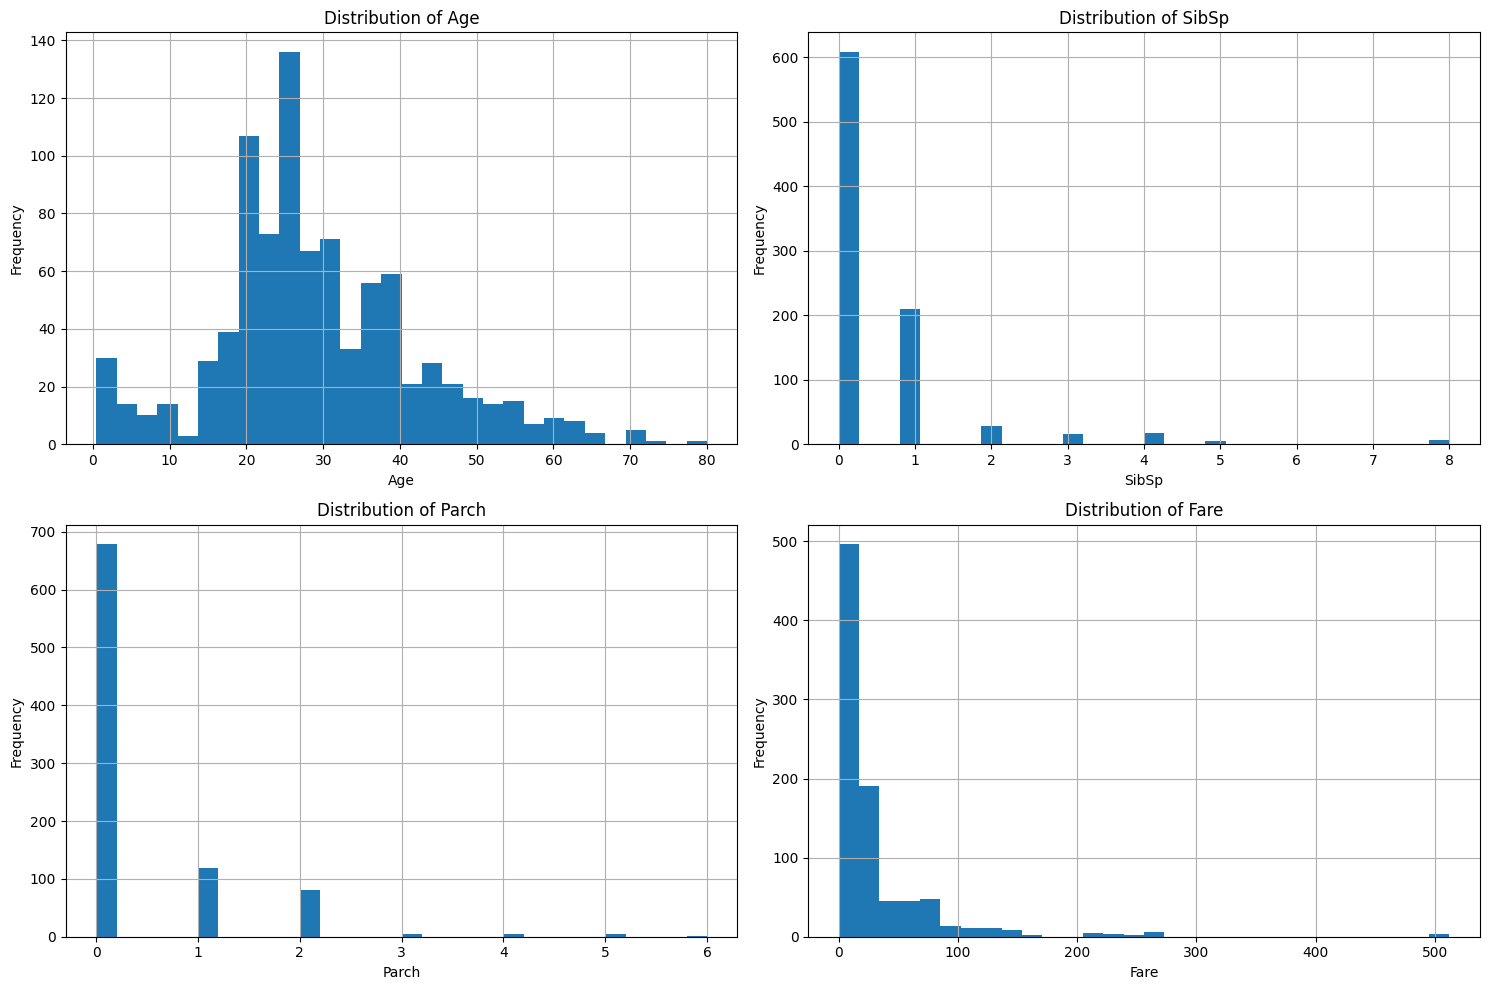

Outlier analysis:
Age: 33 outliers (bounds: [-0.25, 57.75])
SibSp: 46 outliers (bounds: [-1.50, 2.50])
Parch: 213 outliers (bounds: [0.00, 0.00])
Fare: 116 outliers (bounds: [-26.72, 65.63])

Fare values capped at 95th percentile: 112.08

After outlier treatment - Summary:


,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.112424,0.523008,0.381594,27.720486
std,13.304424,1.102743,0.806057,29.225083
min,0.420000,0.000000,0.000000,0.000000
25%,21.500000,0.000000,0.000000,7.910400
50%,26.000000,0.000000,0.000000,14.454200
75%,36.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,112.079150


In [177]:
## 7. Outlier Detection & Treatment

#AI PROMPT: Create a python function that detects and treats outliers in a DataFrame using IQR and visualization

#AI RESPONSE AND COMMENT:
# Select numerical columns for outlier analysis
# Select numerical columns for outlier analysis
# Detect outliers using IQR method
# Treat Fare outliers - cap extreme values
# Create age groups instead of treating outliers


print("=== OUTLIER DETECTION ===")

numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier analysis:")
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers (bounds: [{lower:.2f}, {upper:.2f}])")

fare_q95 = df['Fare'].quantile(0.95)
df['Fare'] = np.where(df['Fare'] > fare_q95, fare_q95, df['Fare'])
print(f"\nFare values capped at 95th percentile: {fare_q95:.2f}")

df['AgeGroup'] = pd.cut(df['Age'], 
                       bins=[0, 12, 18, 35, 60, 100], 
                       labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

print("\nAfter outlier treatment - Summary:")
display(df[numerical_cols].describe())

In [178]:
## 8. Save Cleaned Dataset
df.to_csv("../data/cleaned_dataset.csv", index=False)
print("Cleaned dataset saved to '../data/cleaned_dataset.csv'")

df = pd.read_csv("../data/cleaned_dataset.csv")
print(f"Cleaned dataset shape: {df.shape}")

print("\n=== Summary Statistics of Cleaned Data ===")
df.describe()

Cleaned dataset saved to '../data/cleaned_dataset.csv'
Cleaned dataset shape: (891, 14)

=== Summary Statistics of Cleaned Data ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,27.720486,0.228956
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,29.225083,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,112.079150,1.000000
